In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from sigpyproc.readers import FilReader
from scipy.fft import fft
%matplotlib inline

In [156]:
#Load the converted fil file
filfile_path=Path('/DATA/chime-slow/raw/filterbank/2022/06/18/0120/016ms/1655547755_1655551360_beam_0120_016ms.fil')
#Path('/home/kevin/kevinlukechime/SLOWTRANSIENT/TESTING/clustering/filterbanks/spliced_blc4041424344454647_guppi_59103_01372_PSR_B2021+51_0009.rawspec.0002.fil')
fil_file=FilReader(filfile_path.as_posix())
fil_file.header


Header(filename='/DATA/chime-slow/raw/filterbank/2022/06/18/0120/016ms/1655547755_1655551360_beam_0120_016ms.fil', data_type='filterbank', nchans=1024, foff=-0.390625, fch1=800.0, nbits=32, tsamp=0.01572864, tstart=59748.43235267668, nsamples=229248, nifs=1, coord=<SkyCoord (ICRS): (ra, dec) in deg
    (310.58815375, 46.52188686)>, azimuth=<Angle 0. deg>, zenith=<Angle 0. deg>, telescope='CHIME', backend='CHIME', source='Stationary Beam', frame='topocentric', ibeam=120, nbeams=1, dm=0, period=0, accel=0, signed=False, rawdatafile='', hdrlens=[330], datalens=[938999808], filenames=['/DATA/chime-slow/raw/filterbank/2022/06/18/0120/016ms/1655547755_1655551360_beam_0120_016ms.fil'], nsamples_files=[229248], tstart_files=[59748.43235267668])

In [157]:
#Use sigpyproc3 tools to dedisperse and downsample the data
tdownsamp=1
subband=2
DM=140

data = fil_file.read_block(0, fil_file.header.nsamples)
data = data.dedisperse(DM)
data = data.downsample(tdownsamp, subband)
data = data.normalise()
tseries = data.get_tim()

In [158]:
data.shape    

(512, 229248)

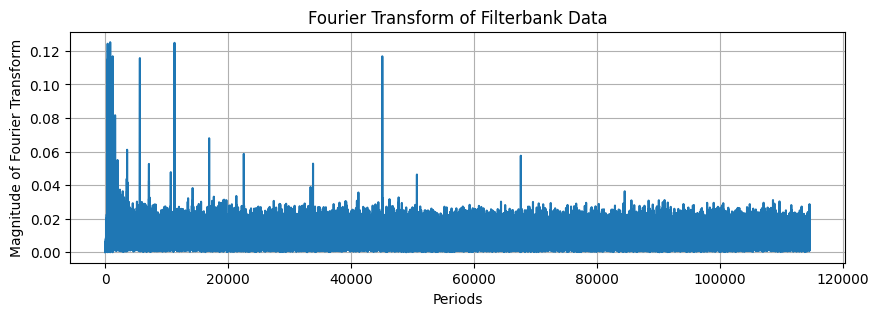

The possible candidates are: [404, 48961, 406, 395, 801, 394, 403, 410, 1203, 90145]


In [178]:
#func to find top candidates from the fourier transform
def top(arr, top):
    candidate = []
    # Delete the first and second element fourier transform
    arr[0]=0
    arr[1]=0
    for i in range(top):
        # We add 1 as the 0th index = period of 1 not 0
        index = np.argmax(arr)
        candidate.append(index+1)
        arr[index]=0
    return candidate  

def perform_fourier_transform(data):
    nchannels, nsamples = data.shape  #nchannels=N =is number of samples in data
    sampling =fil_file.header.tsamp #sampling rate=T
    x = np.linspace(0.0, nsamples*fil_file.header.tsamp , nsamples)
    y = data.mean(axis=0)  # Taking the mean along the first axis (channel-wise mean)
    yf = fft(y)
    xf = np.linspace(0.0, 1.0/(2.0*fil_file.header.tsamp), nsamples//2)
    mag = 2.0/(nsamples * fil_file.header.tsamp) * np.abs(yf[:nsamples//2])
    return xf, mag



xf, mag = perform_fourier_transform(data)
candidates=top(mag,10)

# Plotting the magnitude of the Fourier transform
plt.figure(figsize=(10,3))
plt.plot(mag)
plt.grid()
plt.title('Fourier Transform of Filterbank Data')
plt.xlabel("Periods")
plt.ylabel("Magnitude of Fourier Transform")
plt.show()

print('The possible candidates are:', candidates)